## Convolution 연산 이해

### Convolution 연산 이해하기 1
기존 MLP(다층신경망)은 가중치행렬(W)와 입력벡터(x)가 한번에 내적으로 연산되는 즉, 모두 연결된 fully connected 구조였습니다.<br>
입력 벡터(x)를 h(hidden layer)로 만드는데 필요한 가중치행렬(W)의 Size가 너무 큰 문제 -> 파라미터 개수가 커진다<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
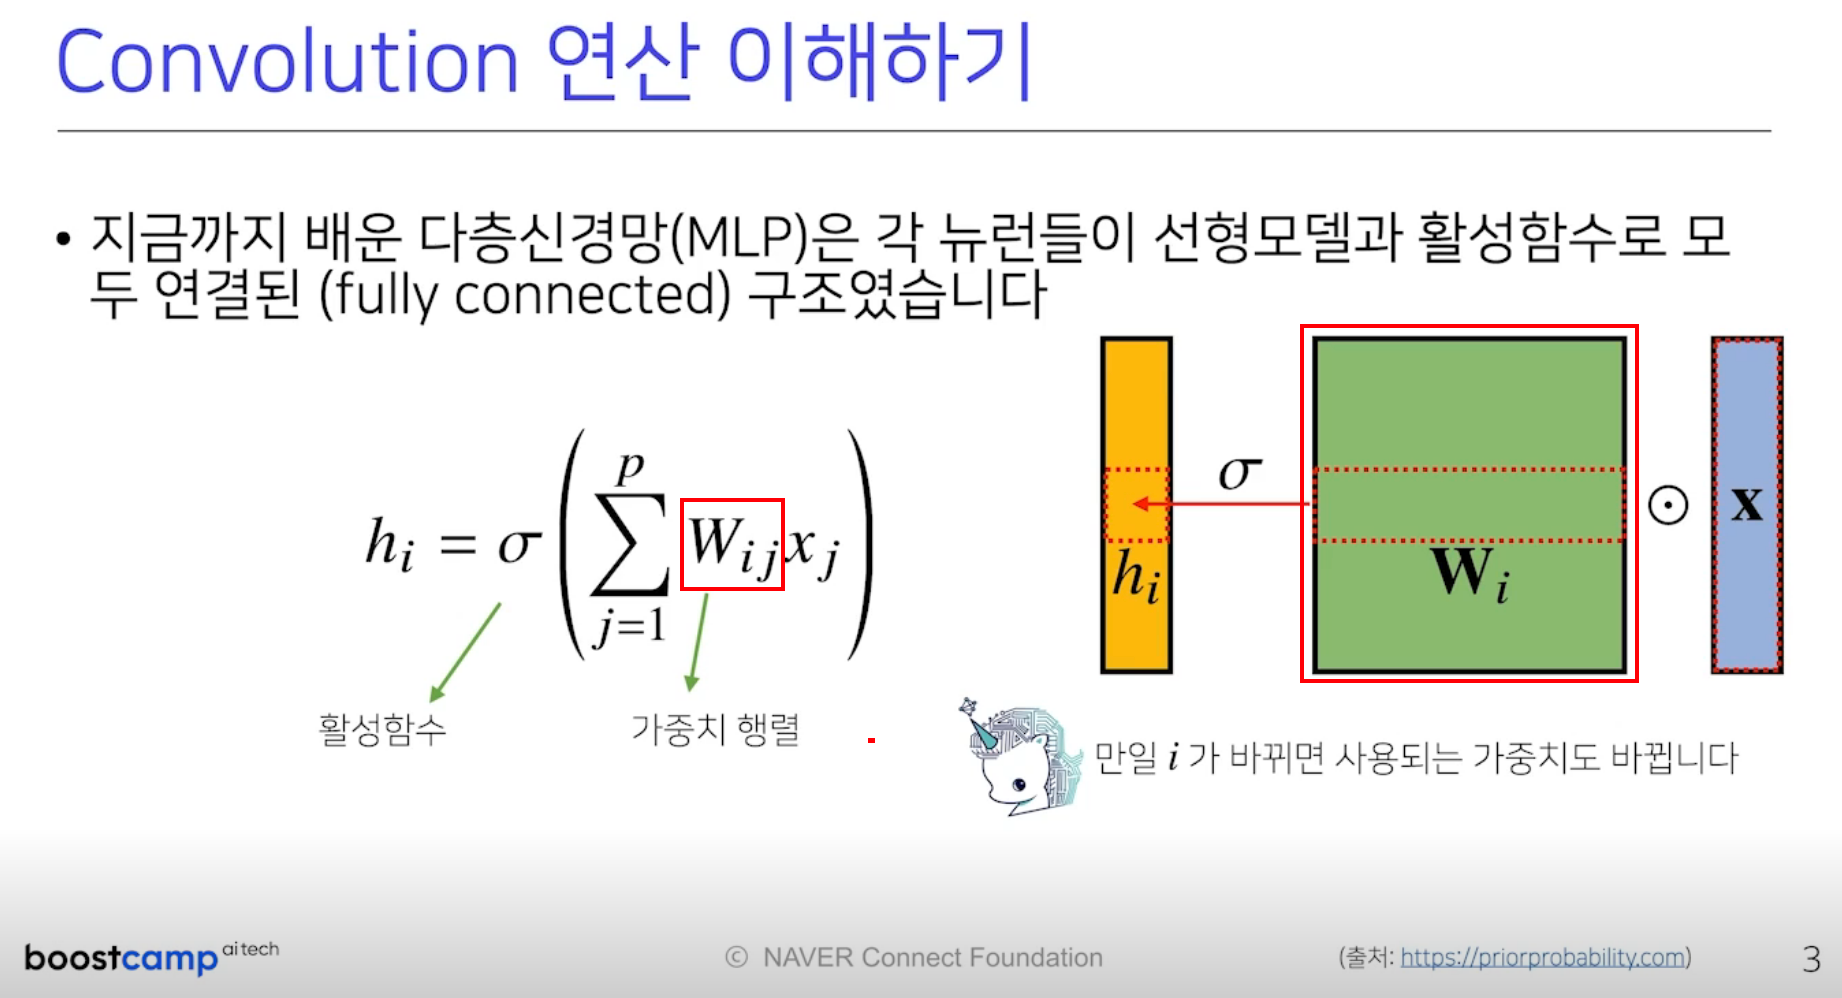

### Convolution 연산 이해하기 2
Convolution연산은 기존 MLP의 연산과 달리 "커널"이라는 것을 사용하게 된다.<br>
고정된 커널을 입력 벡터상에서 움직여가면서, 선형모델과 합성함수가 적용되는 구조로 바뀌었다.<br>
중요한 것은 입력 벡터 x를 모두 활용하는 것이 아니라, 커널 사이즈(k)에 대응되는 사이즈만큼 입력벡터에서 추출하여, 연산하게 된다는 점이다.<br>
즉, h의 i번째(hi)에 들어가는 값은 해당 부분의 커널 사이즈만큼 입력벡터에 대한 연산이다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
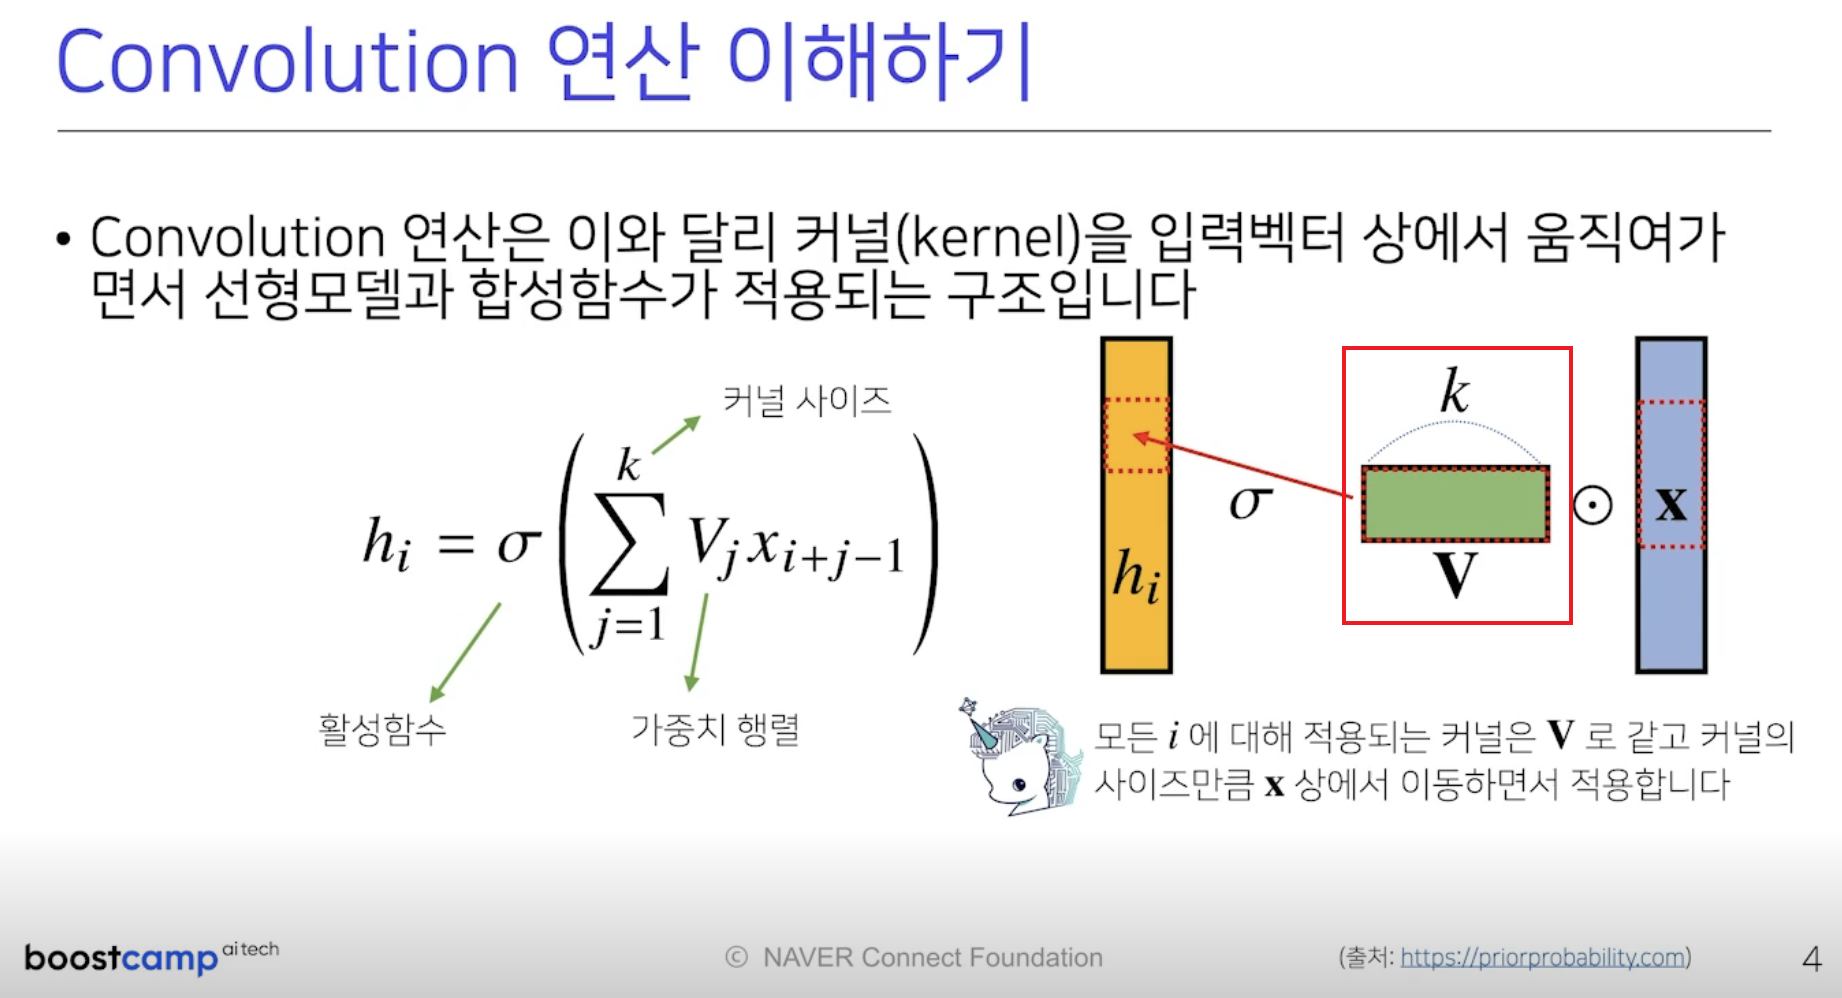

### Convolution 연산 수학적 의미
정의역인 연속 구간 -> 적분 사용, 정의역인 이산 구간 -> 급수(summation)로 표현. 사실 똑같은 의미이다.<br>
즉, 2개의 함수 f와 g가 있을때, x라는 입력에 대해 값을 계산할 때는 전체 정의역에서 f랑 g를 각각 z를 움직여 가면서, 두 함수를 곱한것을 적분하거나, 더한다.<br>

    Convolution 연산의 수학적 의미는 f가 커널에 해당하고, g가 입력에 해당할 때. 입력을 커널을 이용해서 국소적으로 증폭 또는 감소시키는 것이다.
    
<br>
CNN에서 사용하는 연산은 아래 빨간 동그라미와 같이 덧셈으로, 엄밀히 말해 cross-correlation 연산에 속한다. 근데 그냥 Convolution 연산이라고 말하는걸로 굳어져서 쓰고있다.
<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>

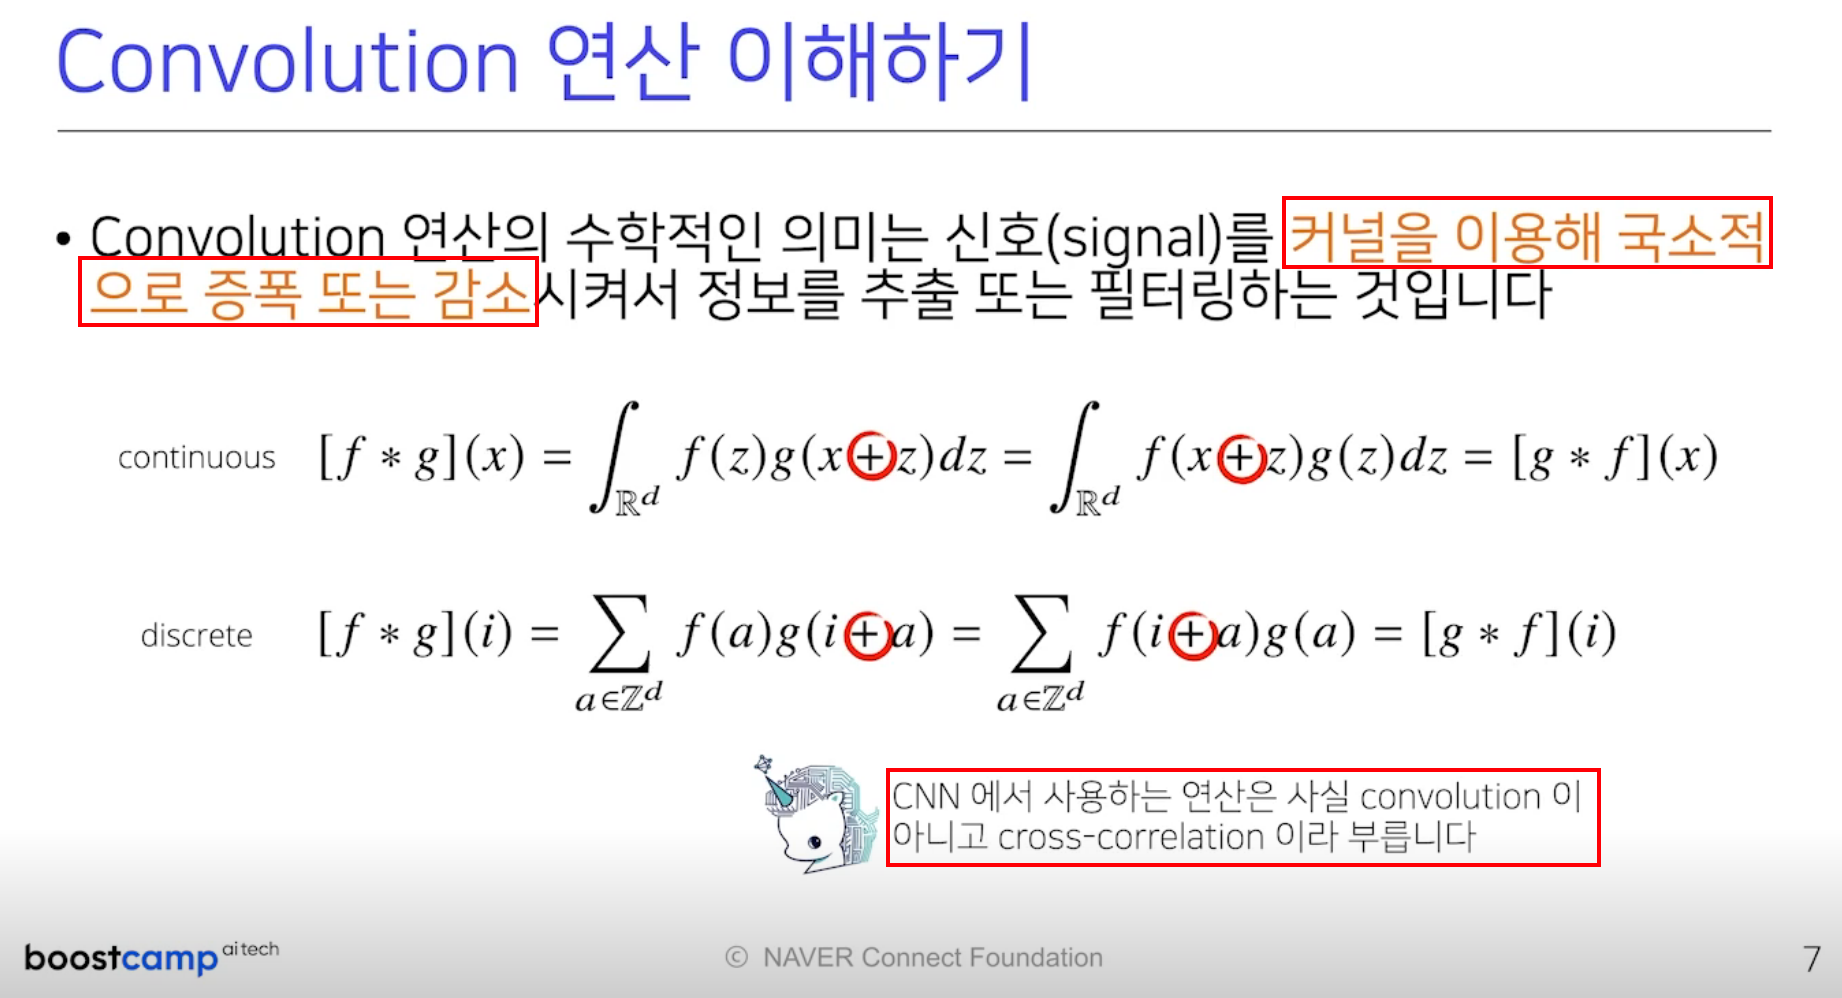

### Convolution 연산 시각화
파란색이 신호(입력)이고, 빨간색이 커널 - 왼쪽에서 오른쪽으로 움직이며 검은선을 그림. 검은선은 결과이다.<br>
커널이 **변화없이(translation invariant)** 움직이면서, 파란색 신호에 대해 **국소적으로(local)** 결과(검은선)를 생성한다. 이는 입력을 증폭시키거나 감소시킨다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
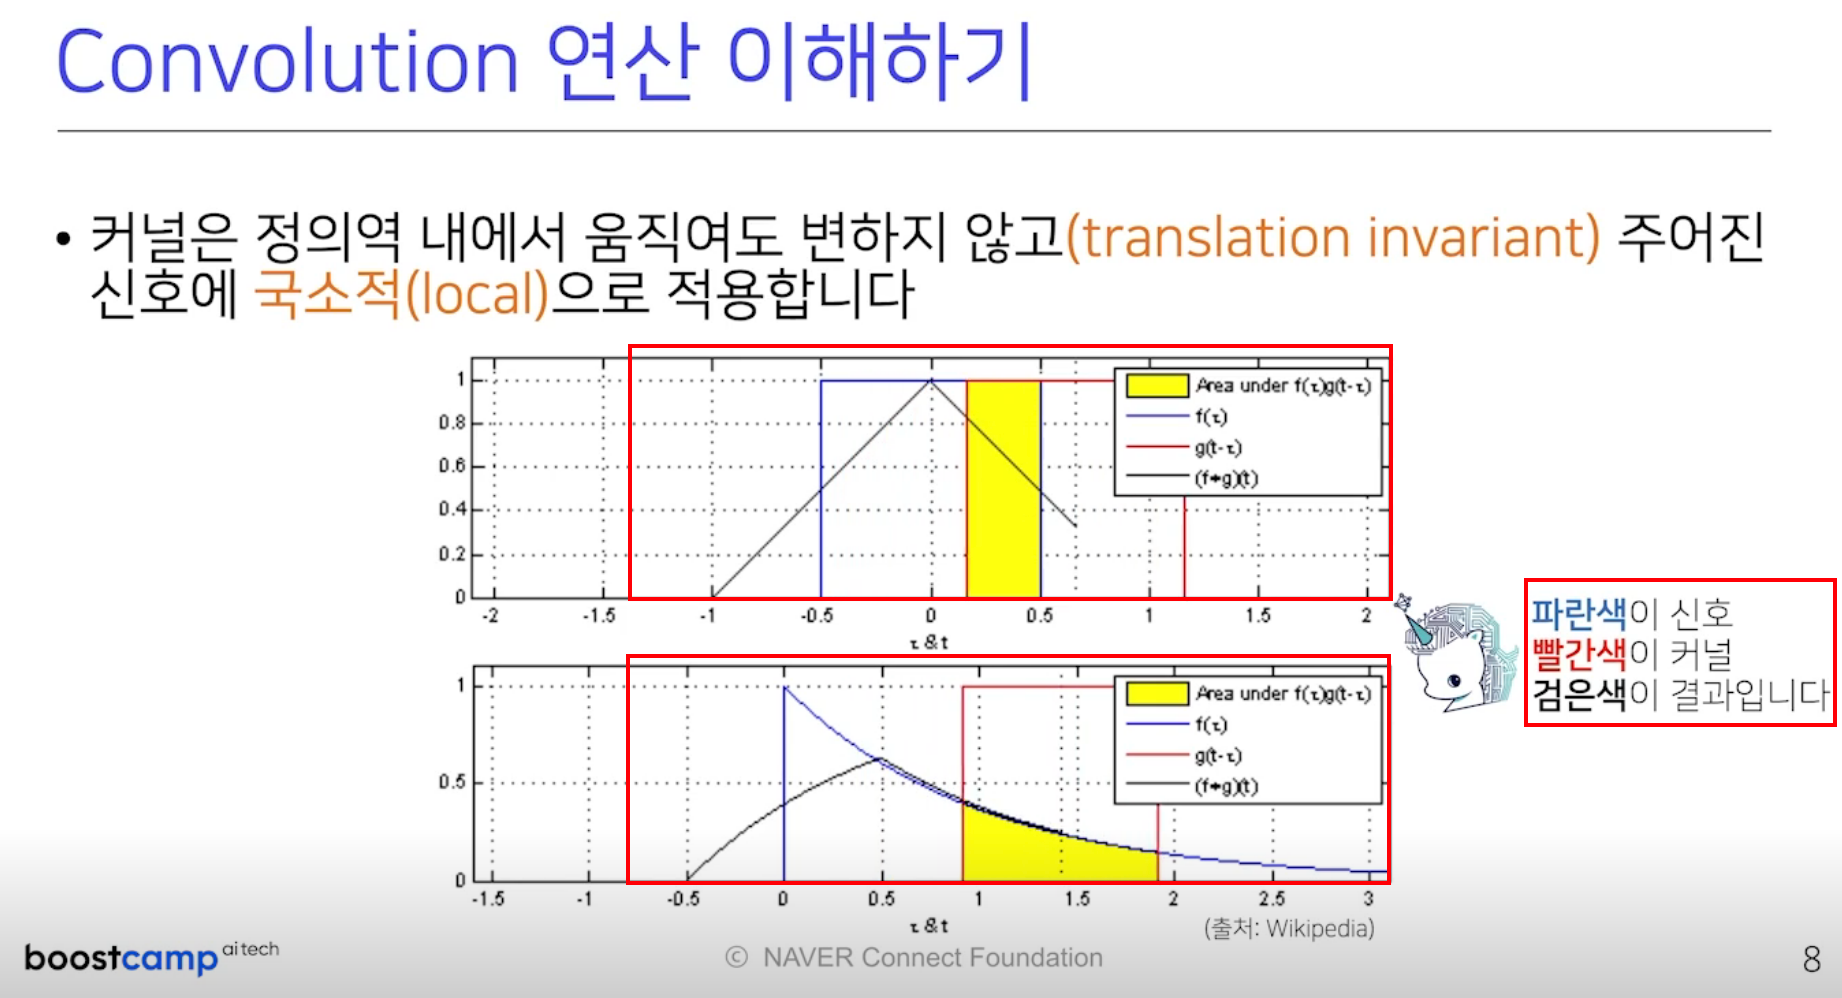

## 다양한 차원에서의 Convolution
1차원이 변수1개에 대해서만 커널이 움직였다면, 2차원은 2개의 변수가 움직이는 것이다.<br>
3차원은 3개 차원에서 변수가 움직이는 것이다.<br>
여기서 중요한 것은, 차원이 높아진다 하더라도, 커널의 값은 바뀌지 않는다는 것이다.<br>
즉, 위치나 차원이 바뀌어도 커널함수 f자체는 변함이 없다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
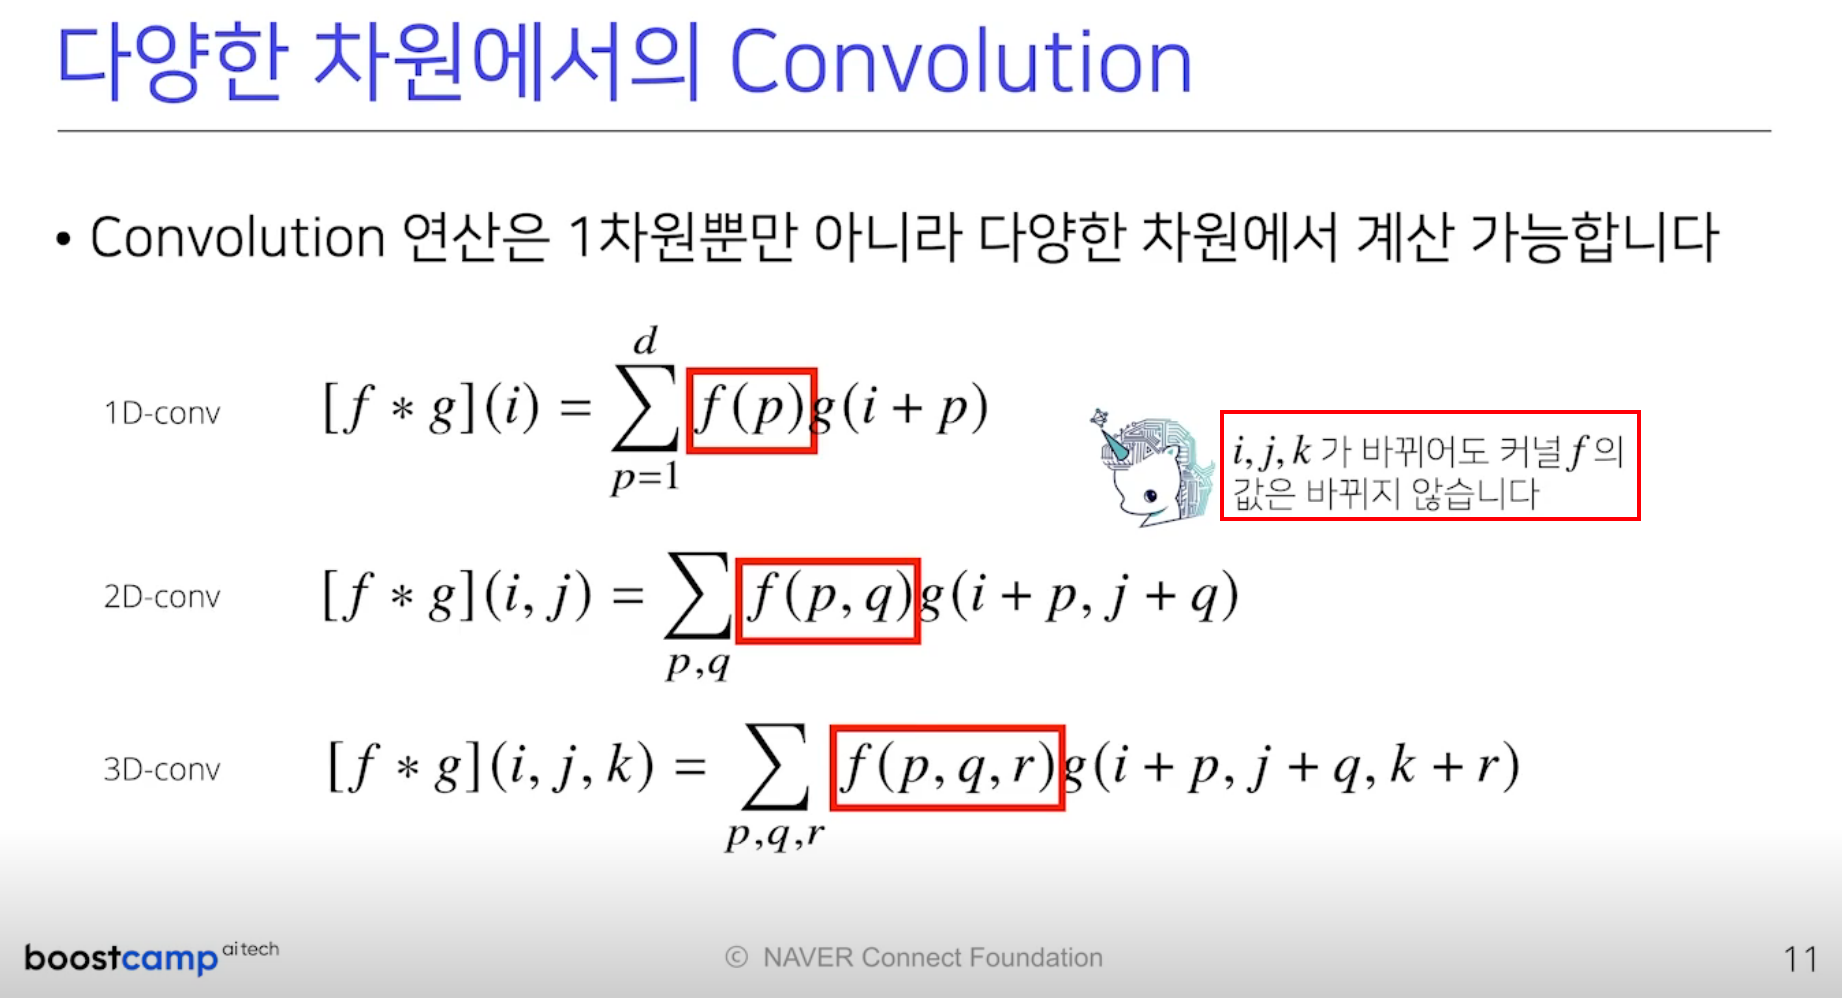

### 2차원 Convolution 연산 이해하기
행렬 모양의 커널을 사용한다.<br>
아래 수식에서, i,j가 고정된 상황에서 p와 q가 움직여가며 계산되는 구조이다.<br>
f(p,q)는 커널값으로 바뀌지 않고, g(i+p,j+q)는 입력값으로 한칸씩 움직여 서로 성분곱(Element-Wise Muliply)를 하게된다.<br>
즉, 첫번째 f(p,q)*g(i+p,j+q)의 결과는 0*0 + 1*1 + 2*3 + 3*4 = 19이다.<br>
현재 아래 사진과 같이 2번째 계산 결과는 0*1 + 1*2 + 2+4 + 3+5 = 25 이다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
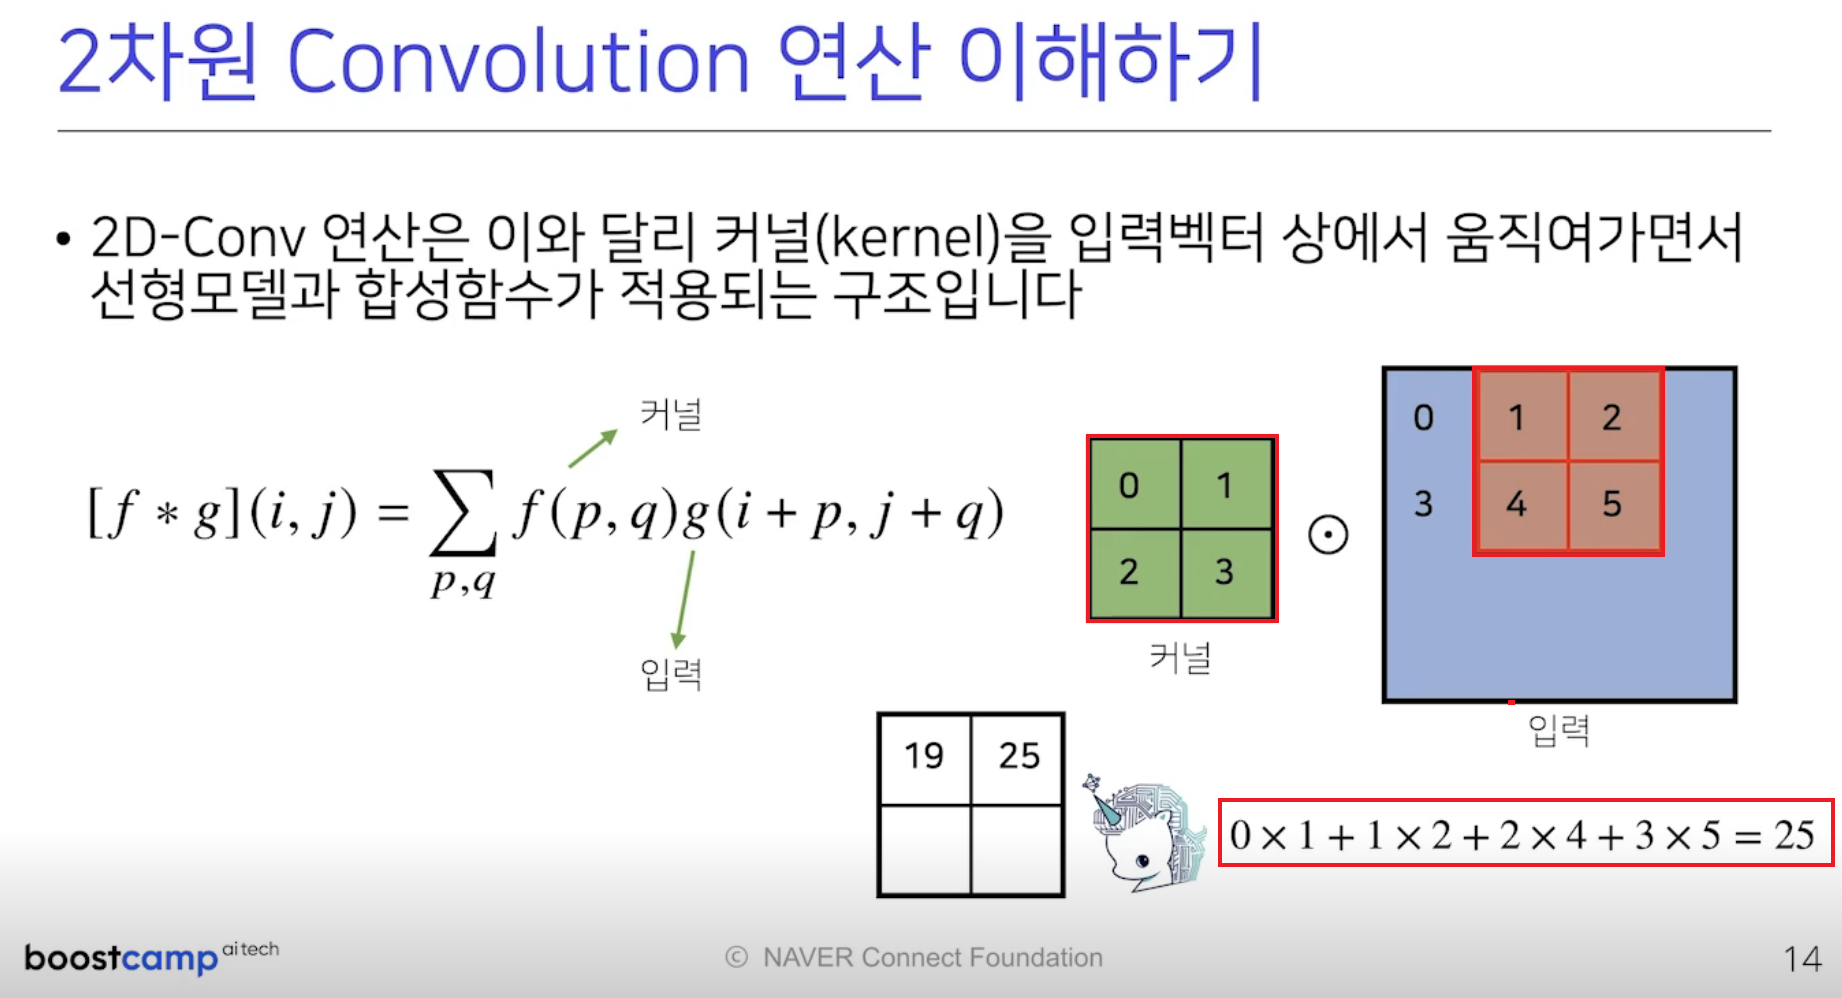

### 입력, 커널사이즈 -> 결과사이즈 계산
입력크기 O와 커널크기 K가 주어졌을 때 결과 크기(높이와 너비)를 예측할 수 있다.<br>
높이는 OH이고, 너비는 OW이다.<br>
예를 들어 5x5에 커널사이즈가 3x3이다 하면 3칸씩 움직이니 결과는 3x3이 될것이다.<br>
또 다른 예시로, 28x28에 대해 커널이 3x3이다하면 26번씩움직이니 결과는 26x26이 될것이다.<br>
간단히 28-3+1로 계산하면 된다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
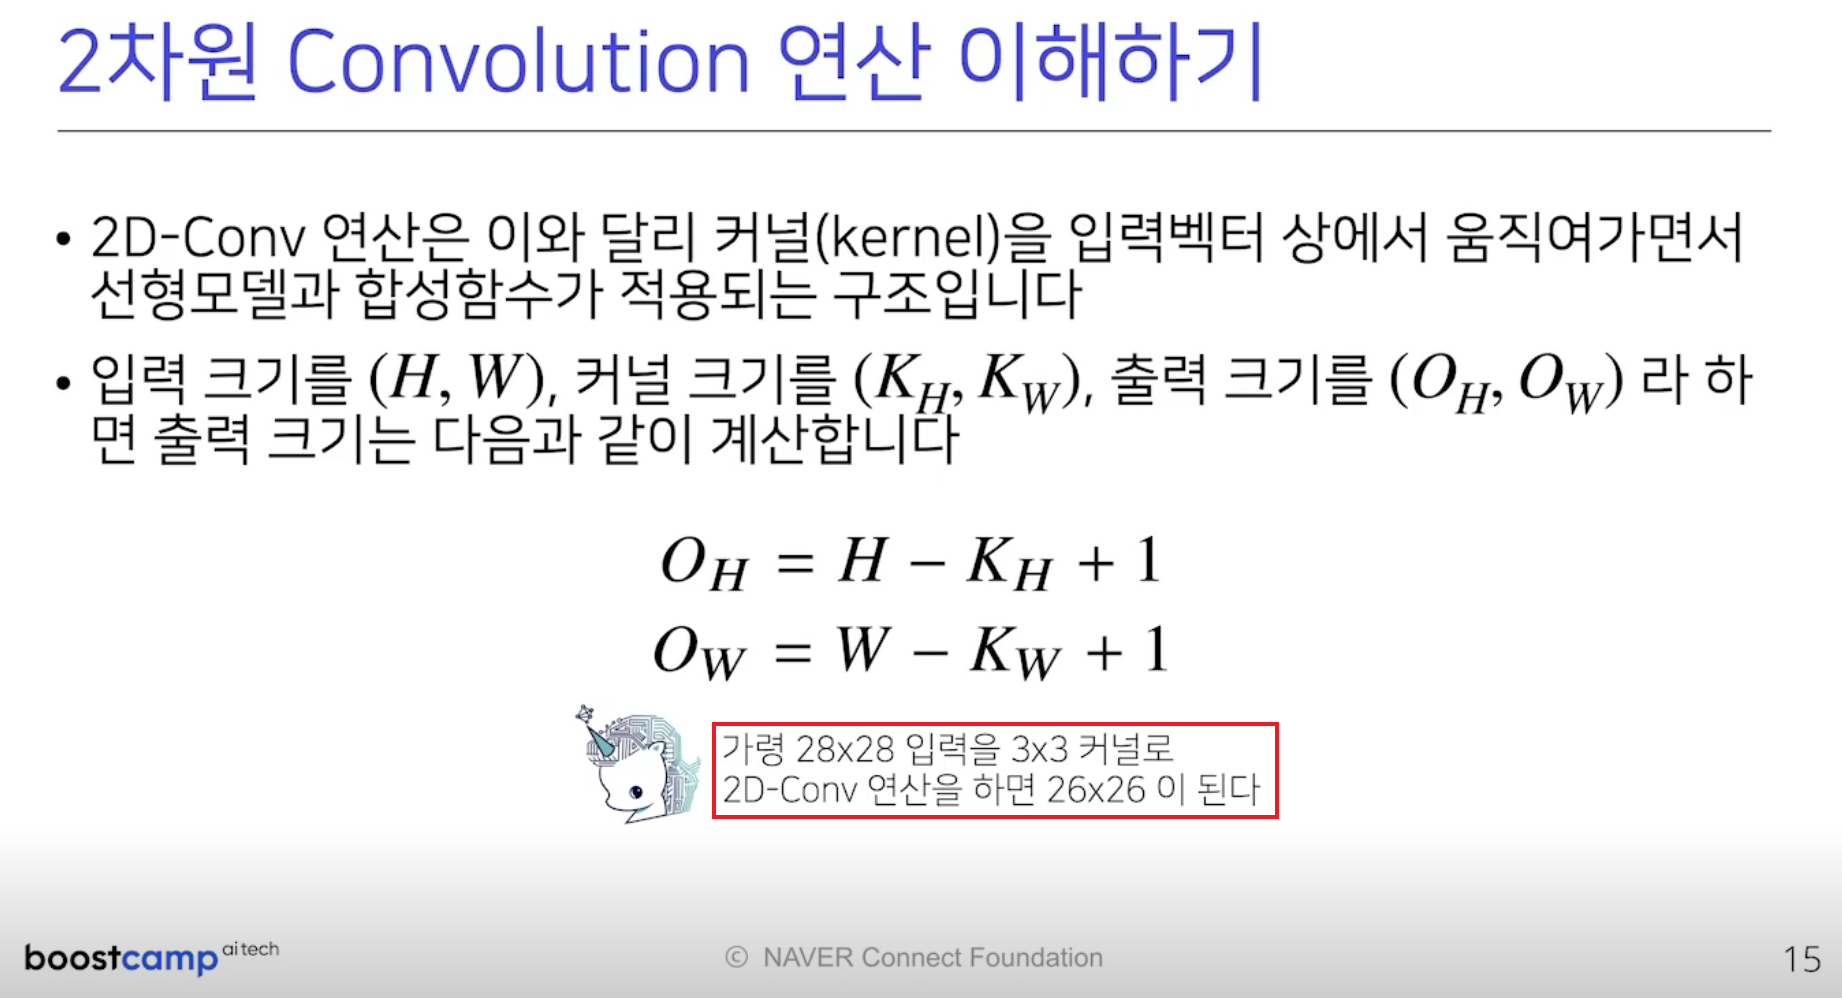

### 여러 2차원 -> 3차원
이미지 자료 보면, 2차원이 여러 채널(RGB 값 등)로 있는 경우가 많다.<br>
이럴 땐, 2차원 연산을 채널 개수만큼 적용한다고 생각하면 된다.<br>
참고로 3차원 부턴 행렬이 아니고, 텐서라고 부른다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>

<br>
이때, 연산은 2차원*커널 연산한것들을 채널끼리 더하면 된다.<br>
-> 채널수와 커널수가 같아야 연산이 된다는 점을 꼭 기억해야한다.<br>
<br>
<br>
<div>
    <img src=attachment:image-2.png width=800>
</div>
<br>
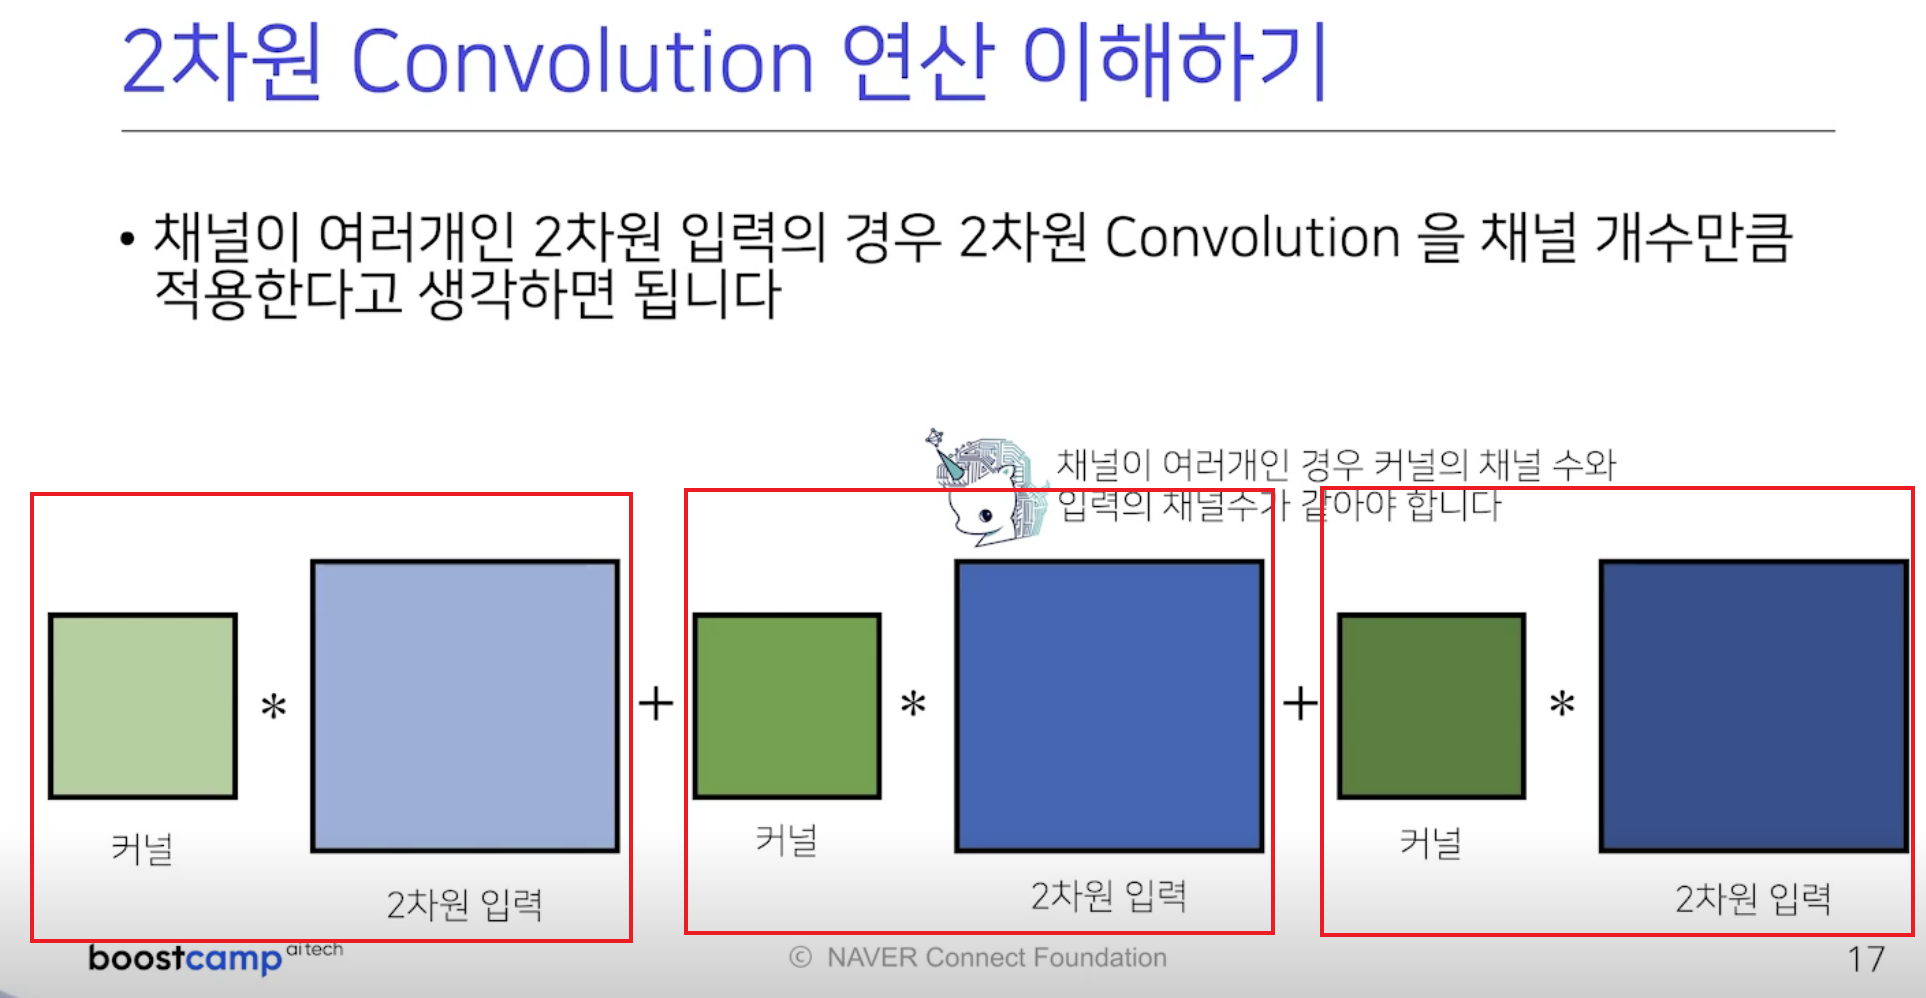
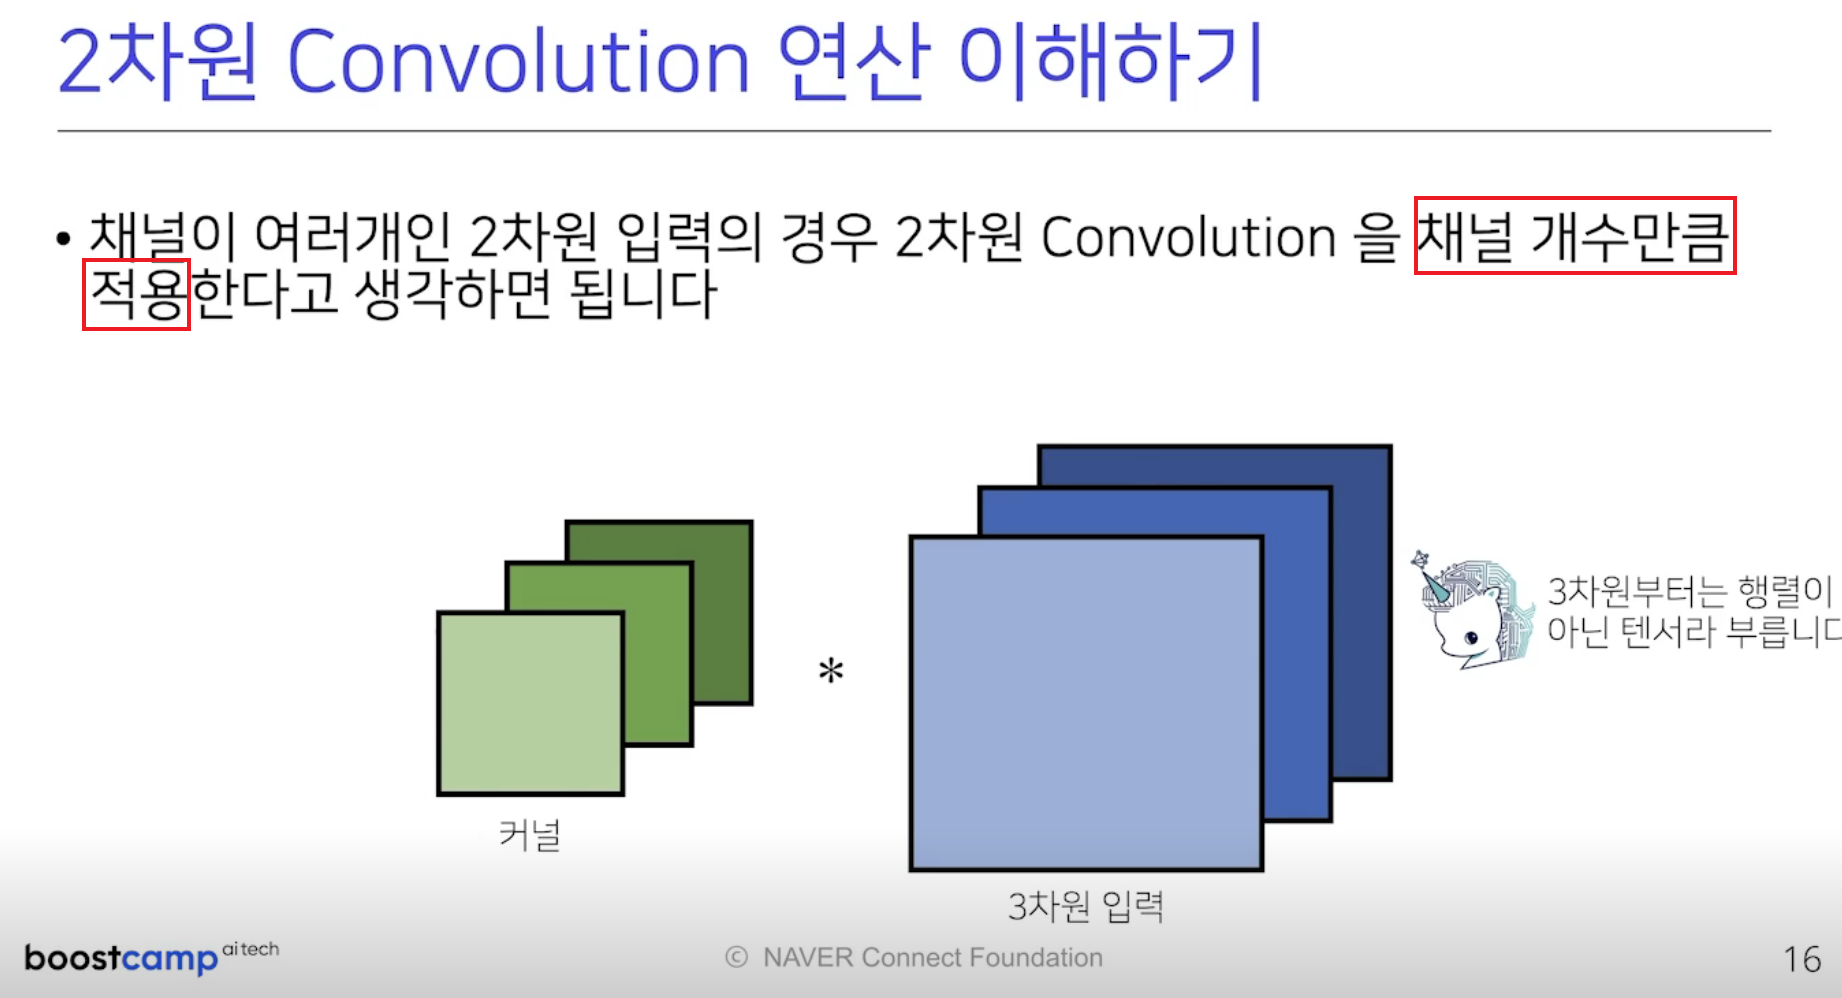

### 3차원 연산 결과 -> 2차원
2차원 n개(3차원)을 커널 n개로 연산한 결과는 채널이 1개인 2차원이 된다. 왜냐하면 2차원*커널들이 다 더해지기 때문이다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
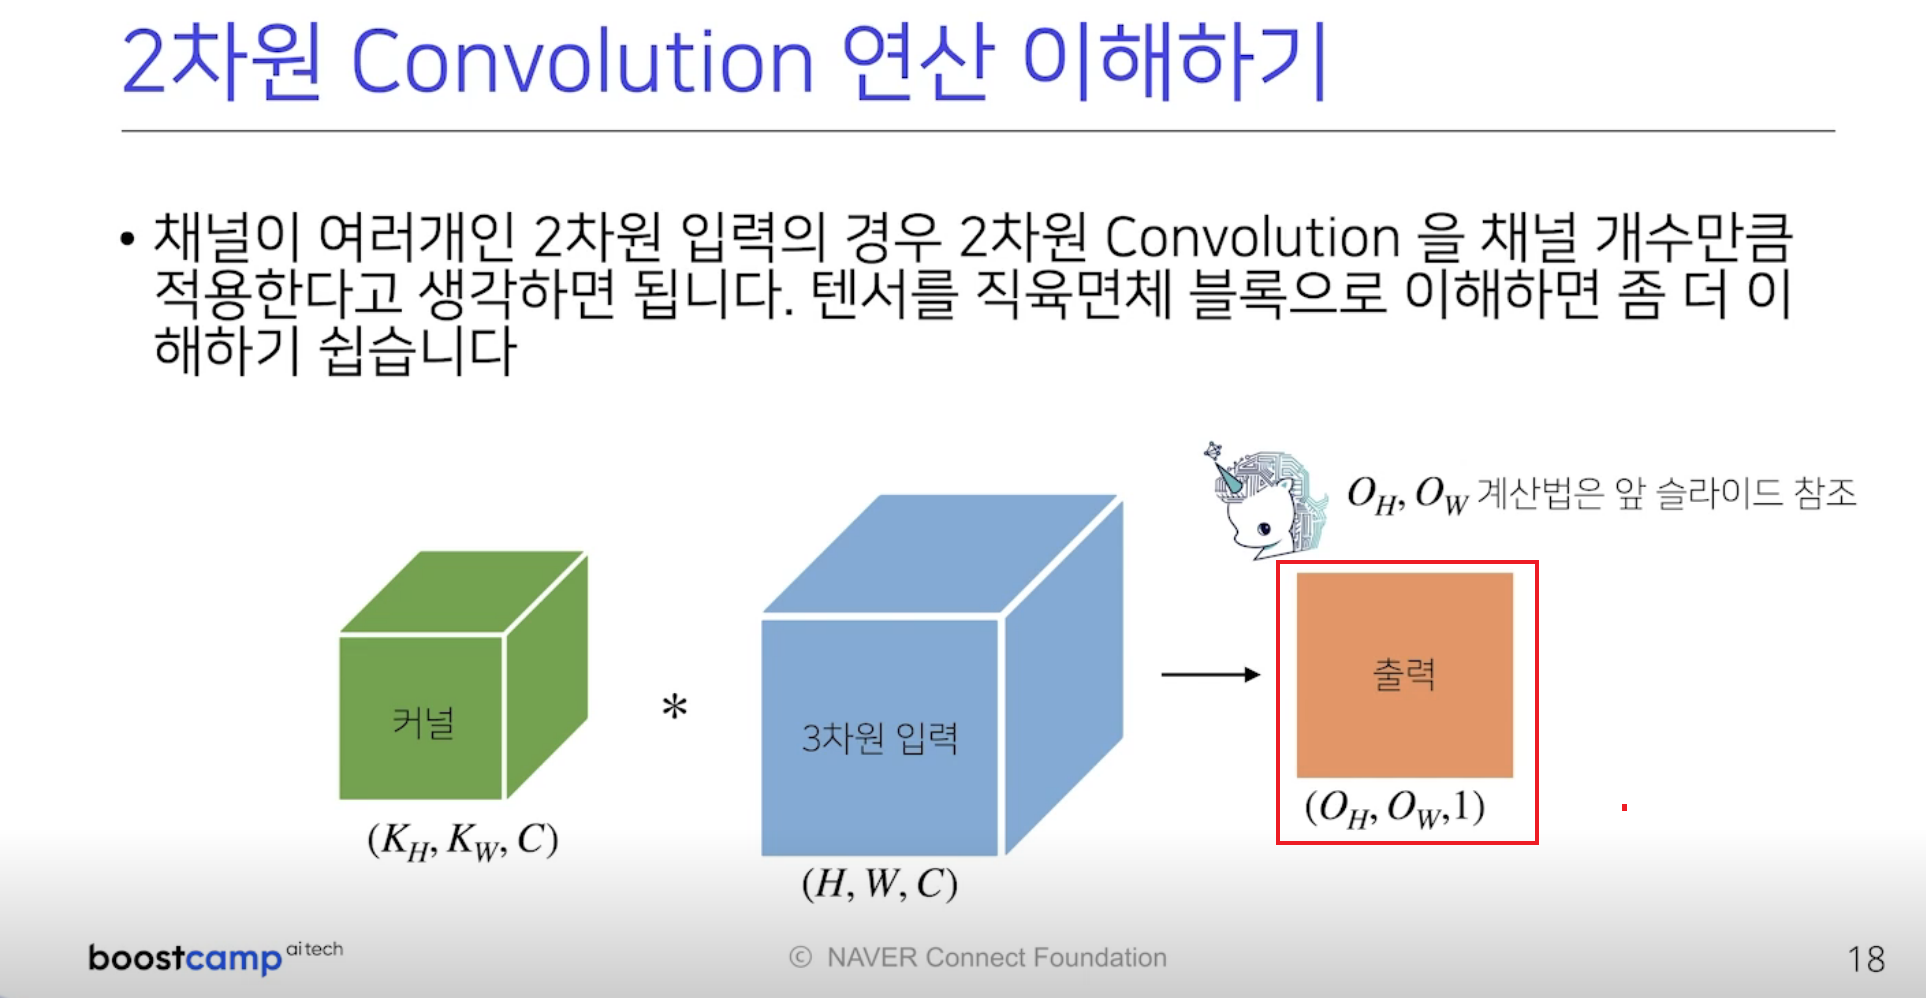

### 연산 결과를 3차원으로 하려면?
연산 결과를 2차원이 아니라, 3차원으로 하려면, 커널 개수를 더 늘리면 된다.<br>
즉, 3차원 커널 개수를 Oc개 만들게 되면, 출력 채널개수도 Oc개 된다.<br>
오늘날 이미지 연산은 보통 이렇게 연산된다. 즉, 입력 커널의 개수를 조절해 줌으로써, 결과의 채널 개수를 조절할 수 있다는게 중요하다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
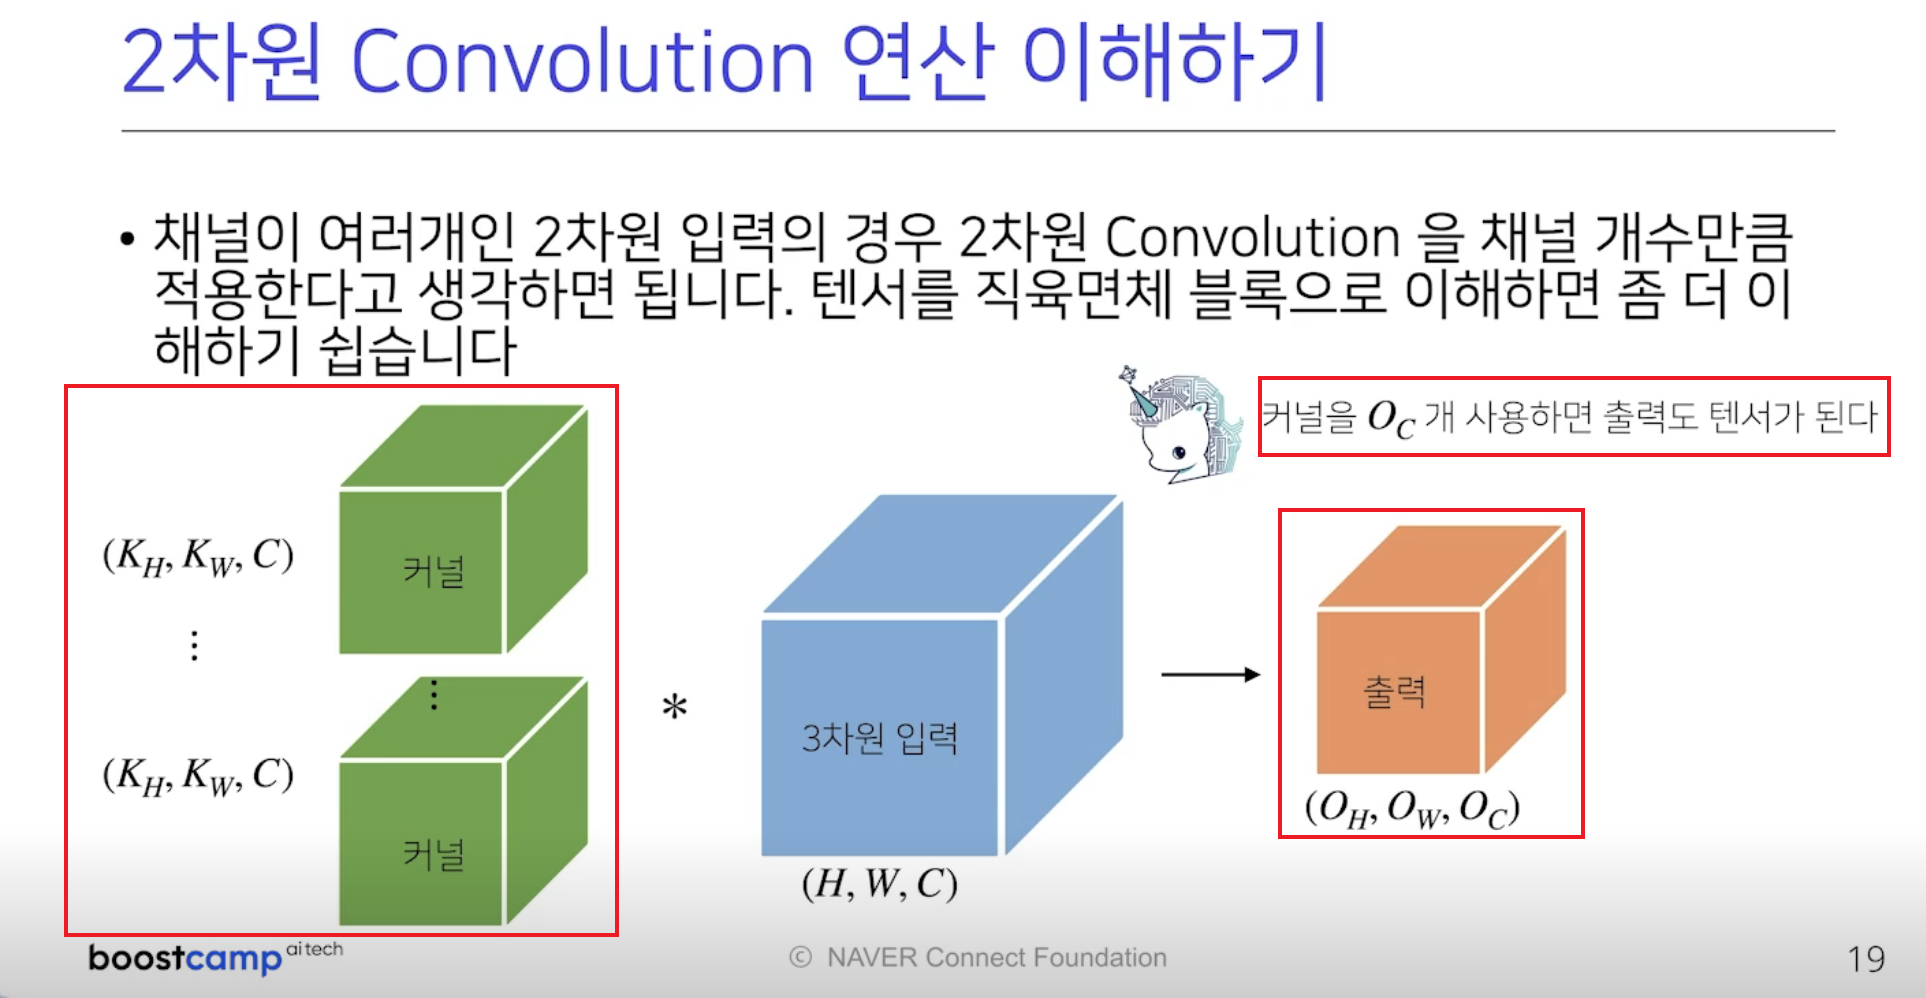

## Convolution 연산의 역전파
MLP의 역전파와 사실 동일하다.<br>
아래 수식을 보면 f(커널함수)와 g(입력)의 도함수가 Convolution 연산을 하는 형태로 역전파가 일어난다.<br>
즉, Convolution 연산은 미분을 해도 똑같이 Convolution 연산이 나온다는 것이다!<br>
이것은 정의역이 연속이든 이산이든 똑같다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
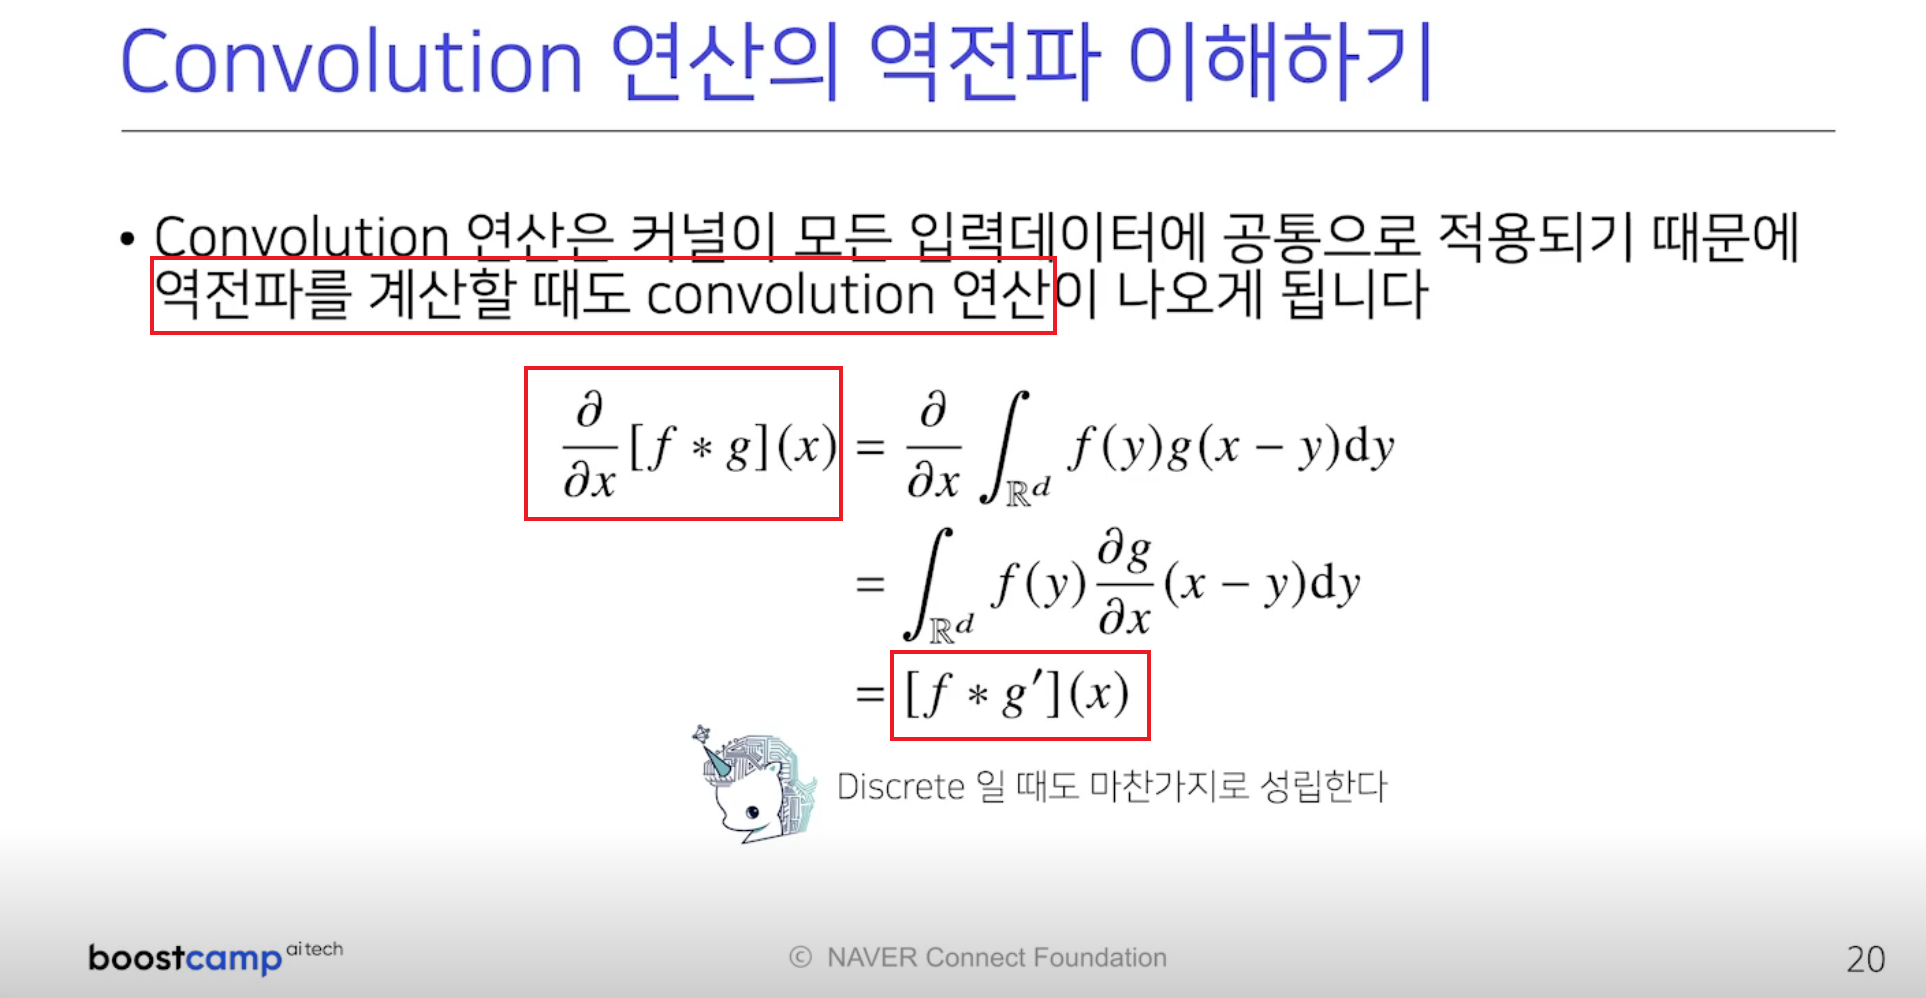

### Convolution 역전파 예시 1
w1,w2,w3 커널이 움직이면서, o1, o2, o3를 계산한다. 아래 화살표 색깔이 커널이 적용된 색깔이다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
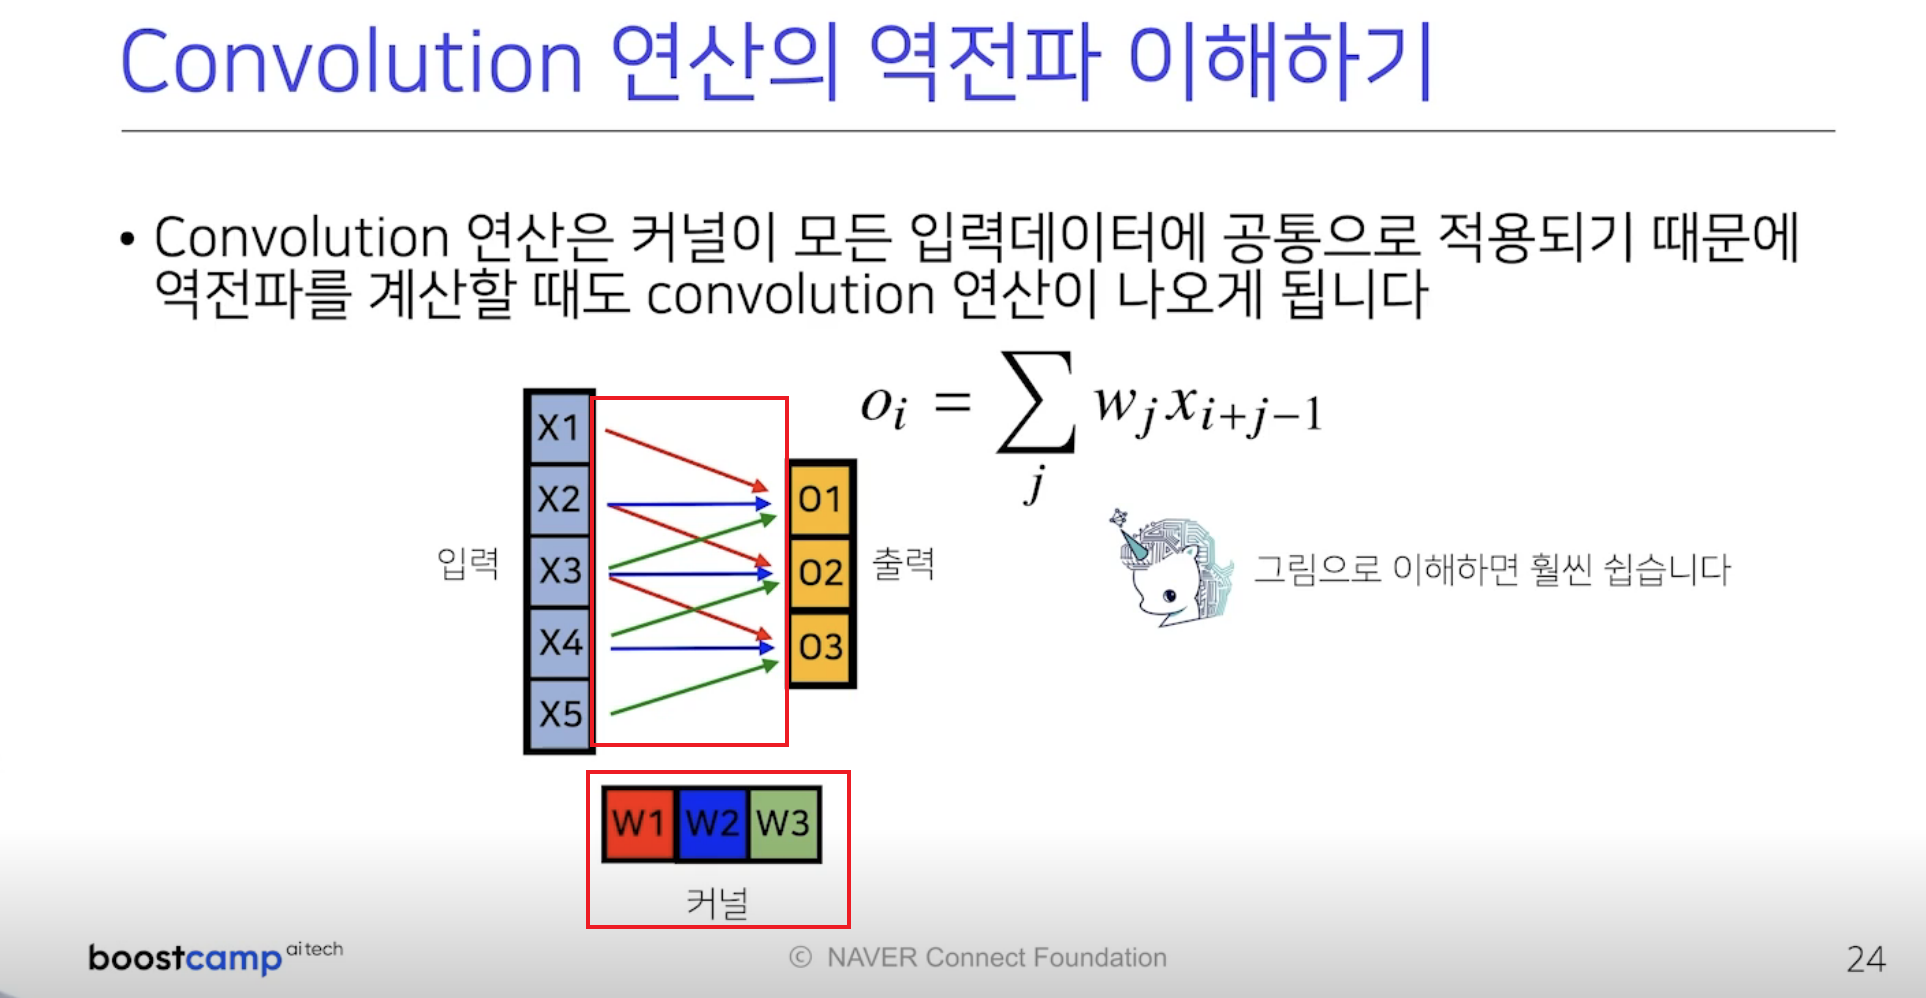

### Convolution 역전파 예시 2 - 입력 업데이트
역전파로 인해 오차함수의 미분값(그래디언트) 벡터들(델타1, 델타2, 델타3)가 어떻게 전달되는지 보자<br>
x3가 순전파에서 커널에 의해 연산된것과 정확히 반대방향으로 커널과 그래디언트가 곱해진것이 x3로 업데이트 된다.<br>
하나만 보면 순전파에서 x3가 o1이 될때, w3가 곱해져서 되었다. 역전파에선 w3에 그래디언트(델타1->o1)가 곱해진게 x3로 업데이트 된다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
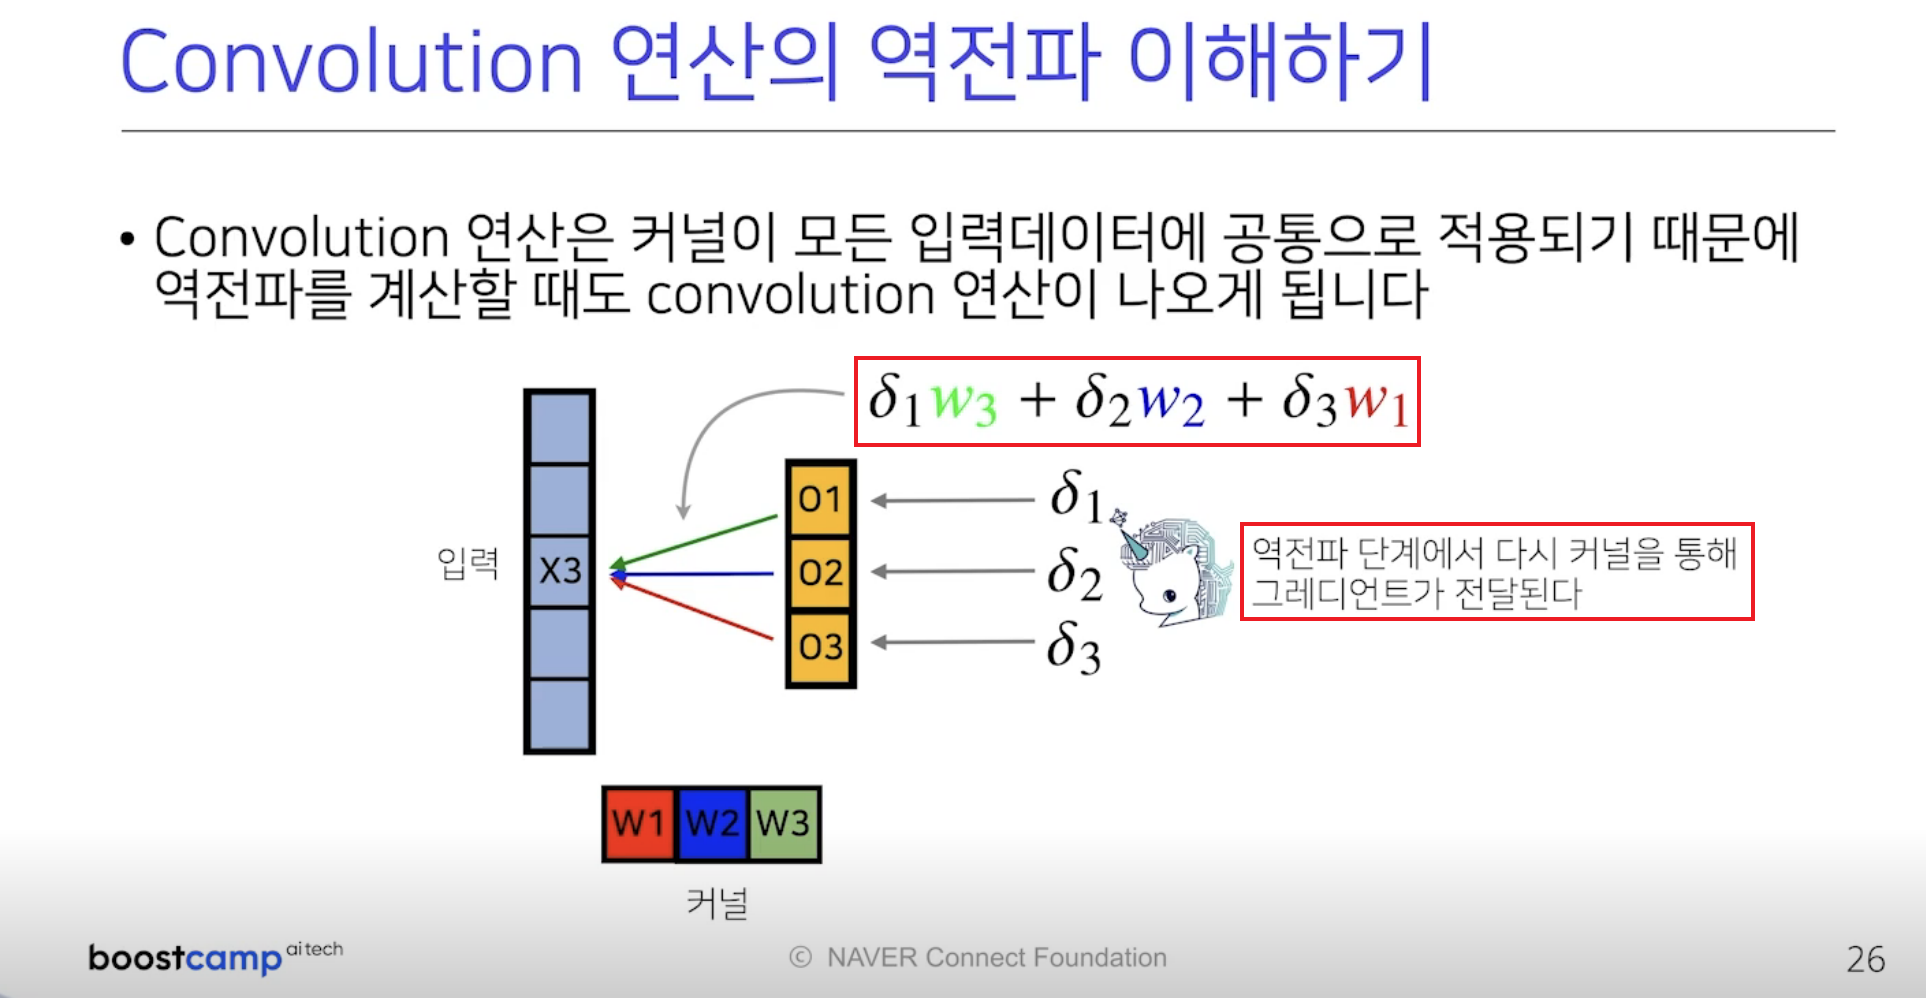

### Convolution 역전파 예시 3 - 커널 업데이트
커널 업데이트는 그래디언트(델타)에 x3를 곱해서 전달된다.<br>
o1으로 전해들어온 델타1이 x3를 통해 w3로 업데이트 된다.<br>
나머지도 순전파에 계산되었던 커널에 그대로 역전파에서도 전달된다.<br>

<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
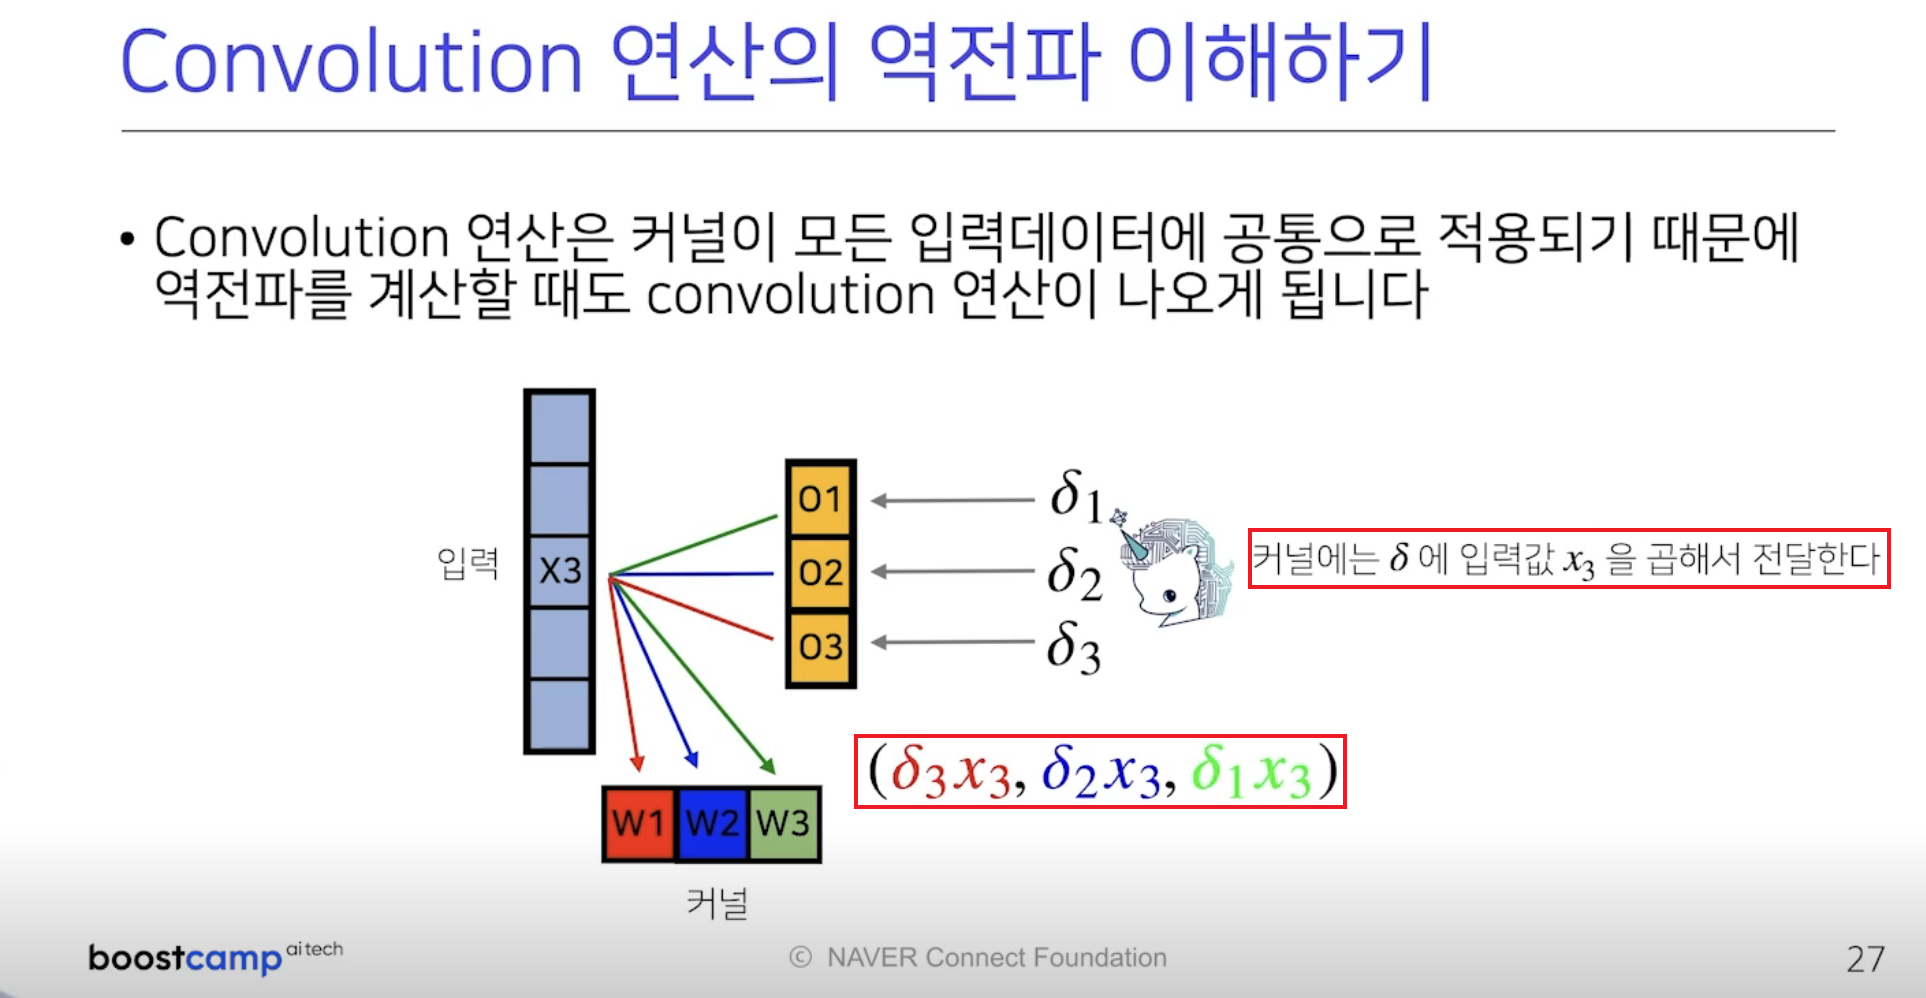

### Convolution 역전파 예시 4 - 커널 업데이트
커널은 모든 입력에 대해 계산되었으므로, 커널이 업데이트 될때도 모든 입력에 대해 곱해지고 더해져서 커널이 업데이트 된다.<br>
즉, 역전파에서는 그래디언트에 대한 Convolution 연산의 합이 커널의 값으로 업데이트 된다.<br>
아래 그림은 W1이 업데이트되는 계산을 시각화한 것이다.<br>
<br>
<div>
    <img src=attachment:image-2.png width=800>
</div>
<br>
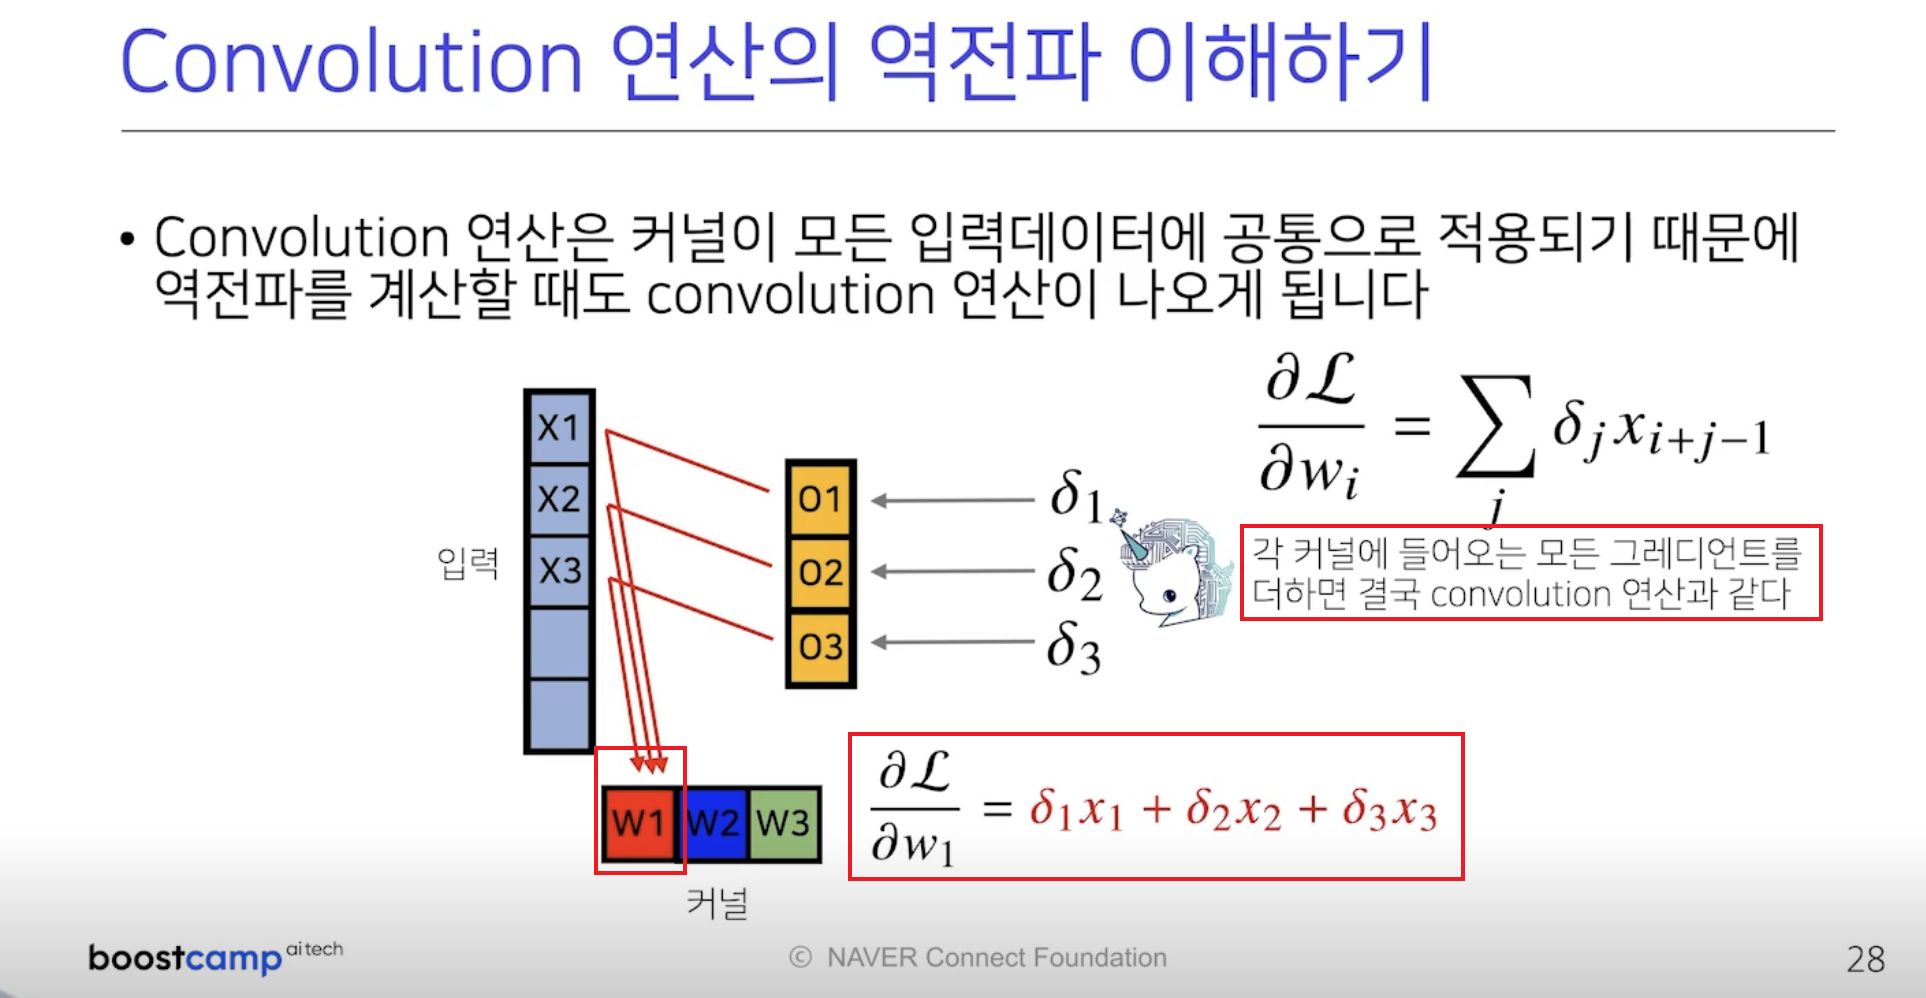

## Summary
1. Convolution 연산의 정의와 특징, 국소성(local)과 변화없음(translation invariant).
2. 2d 이미지에 대해 순전파, 역전파 연산을 예시와 함께 알아보았다.